<a href="https://colab.research.google.com/github/kisung2577/CMPE-255/blob/main/Assignment_6_frequent_pattern_mining_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Apriori Algorithm**

It is an algorithm for frequent item set mining and association rule generation for a relational databse system.
It starts with identifying frequent individual items in the database and extending them to larger candidate item sets till the time those item sets appear sufficiently often in the database. The frequent item sets minned by Apriori can be used to generate association rules with highlight general trends in the database.

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
# Installing mlxtend package
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Loading the dataset from github directly
retail_ds = pd.read_csv('/content/retail_dataset.csv', sep=',')

# Printing top 10 rows 
retail_ds.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


The Above dataset contains rows of all the items that are bought together in same store in same day. It is a retail dataset.

## **Data Preprocessing**

Finding out how many items are Unique in this dataset, since the dataset seems to be sparse.

In [4]:
retail_items = set()
for col in retail_ds:
    retail_items.update(retail_ds[col].unique())
print(retail_items)

{nan, 'Cheese', 'Eggs', 'Bagel', 'Wine', 'Bread', 'Pencil', 'Milk', 'Diaper', 'Meat'}


In [5]:
# Removing NaN
itemset = set(retail_items)
itemset = {x for x in itemset if pd.notna(x)}
itemset

{'Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine'}

So Ideally dataset comprises of only 9 items. Since I will be using mlxtend library, in that apiori model requires a dataframe that has either true and false or 0 and 1. The dataset we have contains all string values. So we need One hot encoding for conversion.

In [6]:
encoded_values = []
for index, row in retail_ds.iterrows():
    rowset = set(row) 
    labels = {}
    uncommon_items = list(itemset - rowset)
    common_items = list(itemset.intersection(rowset))
    for uc in uncommon_items:
        labels[uc] = 0
    for com in common_items:
        labels[com] = 1
    encoded_values.append(labels)
encoded_values[0]
ohe_ds = pd.DataFrame(encoded_values)

# Printing the first 5 rows of one hot encoded data
ohe_ds.head()

,Bagel,Milk,Cheese,Eggs,Wine,Bread,Pencil,Diaper,Meat
0,0,0,1,1,1,1,1,1,1
1,0,1,1,0,1,1,1,1,1
2,0,1,1,1,1,0,0,0,1
3,0,1,1,1,1,0,0,0,1
4,0,0,0,0,1,0,1,0,1


**Applying Apriori**

Since mentioned earlier, I will be using mlxtend library since it provides fast and efficient implementation of apriori.
apriori(df, min_support=0.5, use_colnames=False, max_len=None)
Here 


*   df = dataset 
*   min_support= minimum support
*   use_colnames = It unables us to preserve the column names for itemsets which makes it more readable.
*   max_len = defines maximum length of itemset generated.

In [7]:
apriori_freq_items = apriori(ohe_ds, min_support=0.2, use_colnames=True)
apriori_freq_items.head(7)

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.501587,(Cheese)
3,0.438095,(Eggs)
4,0.438095,(Wine)
5,0.504762,(Bread)
6,0.361905,(Pencil)


In [8]:
# Sorting in descending order to get top 20 frequent itemsets
apriori_frequent_itemsets=apriori_freq_items.sort_values(by=['support'], ascending=False) 
ten_items=apriori_frequent_itemsets[:20]
ten_items

,support,itemsets
5,0.504762,(Bread)
2,0.501587,(Cheese)
1,0.501587,(Milk)
8,0.476190,(Meat)
3,0.438095,(Eggs)
4,0.438095,(Wine)
0,0.425397,(Bagel)
7,0.406349,(Diaper)
6,0.361905,(Pencil)
21,0.323810,"(Meat, Cheese)"


## **Mining Association rules**

In [9]:
assoc_rules = association_rules(apriori_frequent_itemsets, metric="confidence", min_threshold=0.6)
assoc_rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
1,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
4,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
5,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
6,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
7,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
8,"(Meat, Cheese)",(Eggs),0.323810,0.438095,0.215873,0.666667,1.521739,0.074014,1.685714
9,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667


The above result shows which item is frequently purchased with which other item.

## **Visualizing Results**

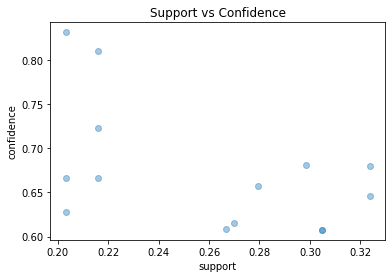

In [10]:
# Plotting grap against Support and confidence
plt.scatter(assoc_rules['support'], assoc_rules['confidence'], alpha=0.4)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

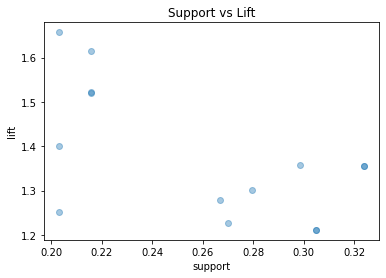

In [11]:
# Plotting grap against Support and lift
plt.scatter(assoc_rules['support'],assoc_rules['lift'], alpha=0.4)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

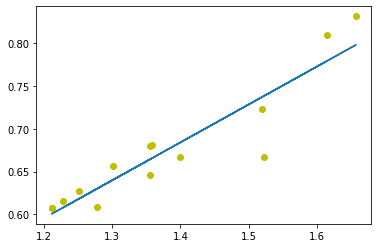

In [12]:
# Plotting grap against lift and confidence
fit = np.polyfit(assoc_rules['lift'], assoc_rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(assoc_rules['lift'], assoc_rules['confidence'],'yo', assoc_rules['lift'], 
 fit_fn(assoc_rules['lift']))

## **FP-Growth**

This algorithm is an improvised version of Apriori Algorithm which is widely used for frequent pattern mining.
What makes it different from Apriori algorithm is, here no candidates generation is required. It uses so called F-trees data structure without generating the candidate sets exclusively. This overcomes the drawback of using Apriori, since because of non-generation of candidate sets, it becomes very efficient in case of large datasets.
As Apriori used multiple scan in the database to check the support of each itemset generated, hence increasing the cost and increasing runtime.
This drawback is also overcome by FP-Growth Algorithm.

I have used the same dataset as used in case of Apriori Algorithm.
Taking min_sup = 0.2

## **Apply FP-Growth**

In [13]:
# Computing frequent itemsets using fpgrowth from mlxtend library
# Since the dataset is preprocessed before will be using the preprocessed dataset i-e ohe_ds
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
fpgrowth_frequent_itemsets = fpgrowth(ohe_ds, min_support=0.2, use_colnames = True)

# Printing frequent itemsets
fpgrowth_frequent_itemsets

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.504762,(Bread)
1,0.501587,(Cheese)
2,0.476190,(Meat)
3,0.438095,(Wine)
4,0.438095,(Eggs)
5,0.406349,(Diaper)
6,0.361905,(Pencil)
7,0.501587,(Milk)
8,0.425397,(Bagel)
9,0.238095,"(Bread, Cheese)"


Generating association rules for the frequent item sets.

In [14]:
association_rules(fpgrowth_frequent_itemsets, metric="confidence", min_threshold=0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
1,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
2,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
3,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
4,"(Cheese, Milk)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429
5,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
6,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
7,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
8,"(Meat, Cheese)",(Eggs),0.323810,0.438095,0.215873,0.666667,1.521739,0.074014,1.685714
9,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667


The above result shows we have multiple combination of products bought together frequently.